<a href="https://colab.research.google.com/github/Marce473/Entregas-Barrios/blob/main/SegundaEntrega%2BBarrios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACTORES QUE INFLUYEN EN EL PESO DE LAS PERSONAS.**



![logo](https://img.freepik.com/vector-premium/mezcle-personas-raza-diferente-altura-tipo-figura-tamano-pie-juntos-aman-su-concepto-cuerpo_48369-43940.jpg?w=1380)

---
## **Índice:**

1. Abstract con motivación y audiencia.
2. Contexto y objetivos.
3. Información a utilizar (dataset).
4. Importación de librerias y carga de Dataset.
5. Análisis general de los datos.
6. Agregamos el campo IMC (Índice Masa Corporal).
7. ¿Cómo se dividen los datos respecto al género?
8. Análisis de las variables categóricas.
9. Análisis de las variables numéricas.
10. ¿La población consultada tiene mayoritariamente algún grado de sobrepeso u obesidad?
11. ¿Cómo se relaciona el peso con la altura?
12. ¿Influyen los antecedentes familiares en el sobrepeso?
13. ¿Cómo se distribuyen las distintas categorías de NObeyesdad y de cat_IMC respecto a las edades estudiadas?
14. Análisis de la relación entre el medio de transporte más utilizado y el peso, diferenciando si consumen tabaco o no.
15. Análisis de la relación entre cat_IMC, el género y el tipo de transporte utilizado.


---

## **1 - Abstract con motivación y audiencia:**

El estudio en cuestión busca analizar distintos hábitos y costumbres cotidianas de las personas, y poder identificar los factores que mayor relevancia tienen en su peso.

Esto es importante para poder gestionar distintas políticas en diversas áreas buscando prevenir enfermedades, e incentivando una mayor conciencia personal y familiar, buscando generar una mejor calidad de vida.

Existen distintas entidades que se deben involucrar en esta problemática y gestionar acciones al respecto desde distintos ángulos:
*   Organismos de salud.
*   Organismos educativos de distintos niveles, tanto públicos como privados.
*   Empresas.

## **2 - Contexto y objetivos:**

**Contexto Comercial:**

Se busca poder conocer mejor la problemática del sobrepeso, identificar y diferenciar las dos grandes segmentaciones de sobrepeso y obesidad, y poder generar mejores políticas y campañas de prevención para poder reducirla.

**Definición de Objetivo:**

Predecir los factores que más favorecen el sobrepeso de las personas en relación a la alimentación, actividad física, entre otras.

**Contexto Analítico:**

Utilizando la información del dataset en conjunto con técnicas de análisis de datos y distintos modelos, se buscará dar respuestas a las preguntas e hipótesis planteadas posteriormente.

## **3 - Información a utilizar (dataset):**

Para poder desarrollar el estudio en cuestión se utiliza información obtenida de una [encuesta web anónima](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) a habitantes de México, Perú y Colombia, dentro de una franja etaria de entre 14 y 61 años.

De dicha encuesta se recopila información de **2111 personas** sobre los siguientes campos:
*   Gender: Género.
*   Age: Edad.
*   Height: Altura.
*   Weight: Peso.
*   Family_history_with_overweight: Historial familiar con sobrepeso.
*   FAVC: Frecuencia de consumo de alimentos altos en calorías por semana.
*   FCVC: Frecuencia de consumo de vegetales por semana.
*   NCP: Número de comidas principales por día.
*   CAEC: Consumo de alimentos entre comidas.
*   SMOKE: Consumo de tabaco.
*   CH2O: Consumo de agua diario.
*   SCC: Control del consumo de calorías.
*   FAF: Frecuencia de actividad física por semana.
*   TUE: Tiempo de uso de dispositivos tecnológicos por semana.
*   CALC: Consumo de alcohol.
*   MTRANS: Transporte utilizado.
*   NObeyesdad: Nivel de obesidad.




Se decide agregar el campo IMC (Índice de Masa Corporal), el cual relaciona el peso con la altura:

$$IMC = \frac{peso}{altura*altura}$$

Y posee las siguientes clasificaciones:

Clasificación | Rangos
:---: | :---:
Insuficiente | menor de 18.5
Normal | entre 18.5 y 24.9
Sobrepeso_I | entre 25.0 y 26.9
Sobrepeso_II | entre 27.0 y 29.9
Obesidad_I | entre 30.0 y 34.9
Obesidad_II | entre 35.0 y 39.9
Obesidad_III | mayor que 40.0

La idea de agregar este campo es poder comprobar si hay diferencia entre la clasificación original del dataset ("NObeyesdad"), y la clasificación conocida popularmente mediante dicha fórmula.

## **4 - Importación de librerias y carga de Dataset:**

In [ ]:
# Carga de datos
from google.colab import drive

# Trataimento de datos:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

# Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Visualizacipon de nulos:
import missingno as msno

# Detección de outliers
from sklearn.ensemble import IsolationForest

# Estadística:
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import pointbiserialr, spearmanr, pearsonr, contingency

# División en train y test:
from sklearn.model_selection import train_test_split

# Modelos de regresión:
from sklearn.linear_model import LinearRegression

# Modelos de clasificación:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Modelos de clustering:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Métricas:
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Montamos Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Especificamos la ruta al archivo
ruta_csv = '/content/drive/MyDrive/Coderhouse - Data Science/Entregas/2 entrega/ObesityDataSet.csv'

# Leemos el archivos con un DataFrame de pandas
df = pd.read_csv(ruta_csv, sep = ',')

In [ ]:
# Configuramos el estilo de gráficos con el que vamos a trabajar
plt.style.use('bmh')

## **5 - Análisis general de los datos:**

In [ ]:
# Mostramos el DataFrame
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Mostramos la información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Cambiamos el tipo de dato del campo 'Age' de flotante a entero
df['Age'] = df['Age'].astype(int)

In [ ]:
# Cambiamos la cantidad de decimales de los campos 'Height' y 'Weight'
df['Height'] = df['Height'].round(2)
df['Weight'] = df['Weight'].round(2)

### Verificación de datos nulos y duplicados:

In [ ]:
# Verificamos la presencia de valores nulos
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<Axes: >

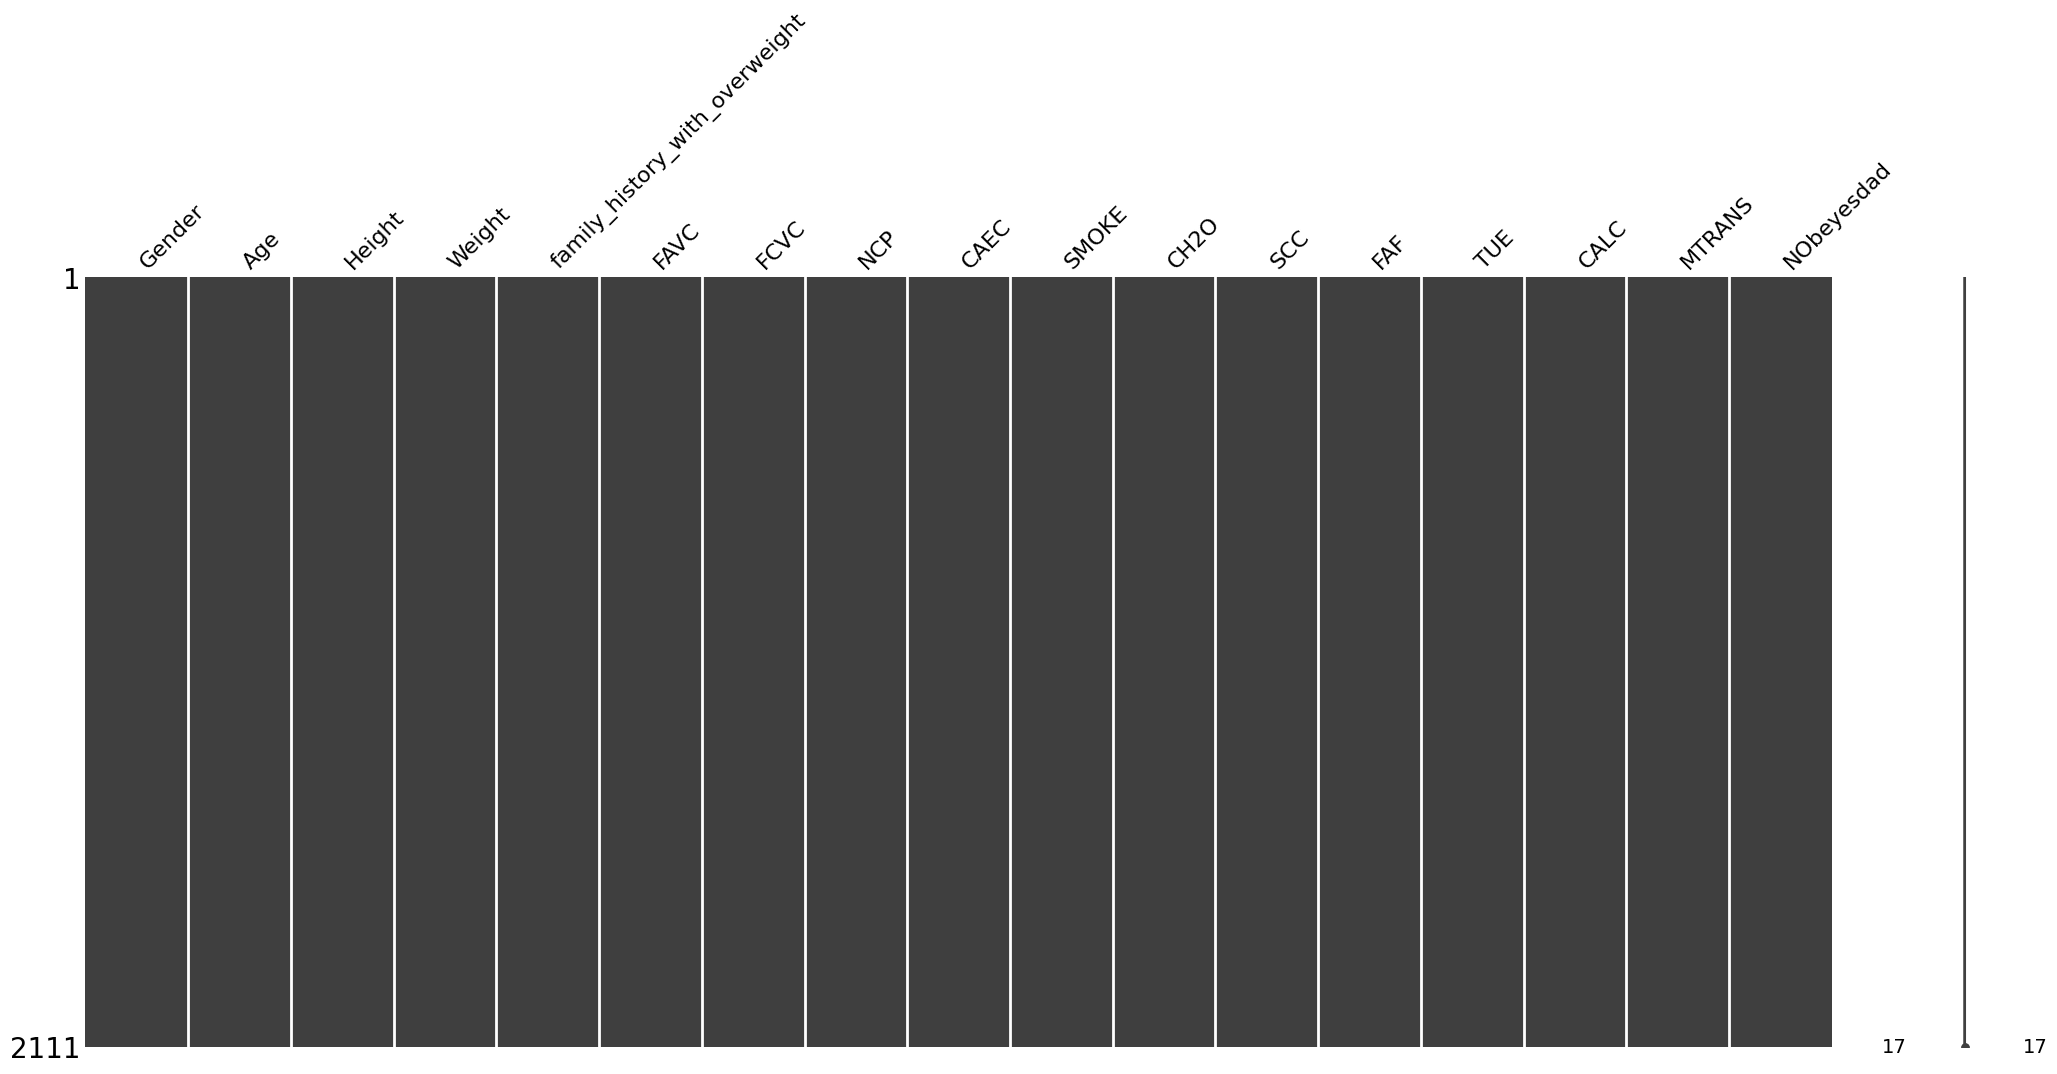

In [ ]:
# Visualización tipo matriz: Identifica el patrón de ausencia de datos
msno.matrix(df)

<Axes: >

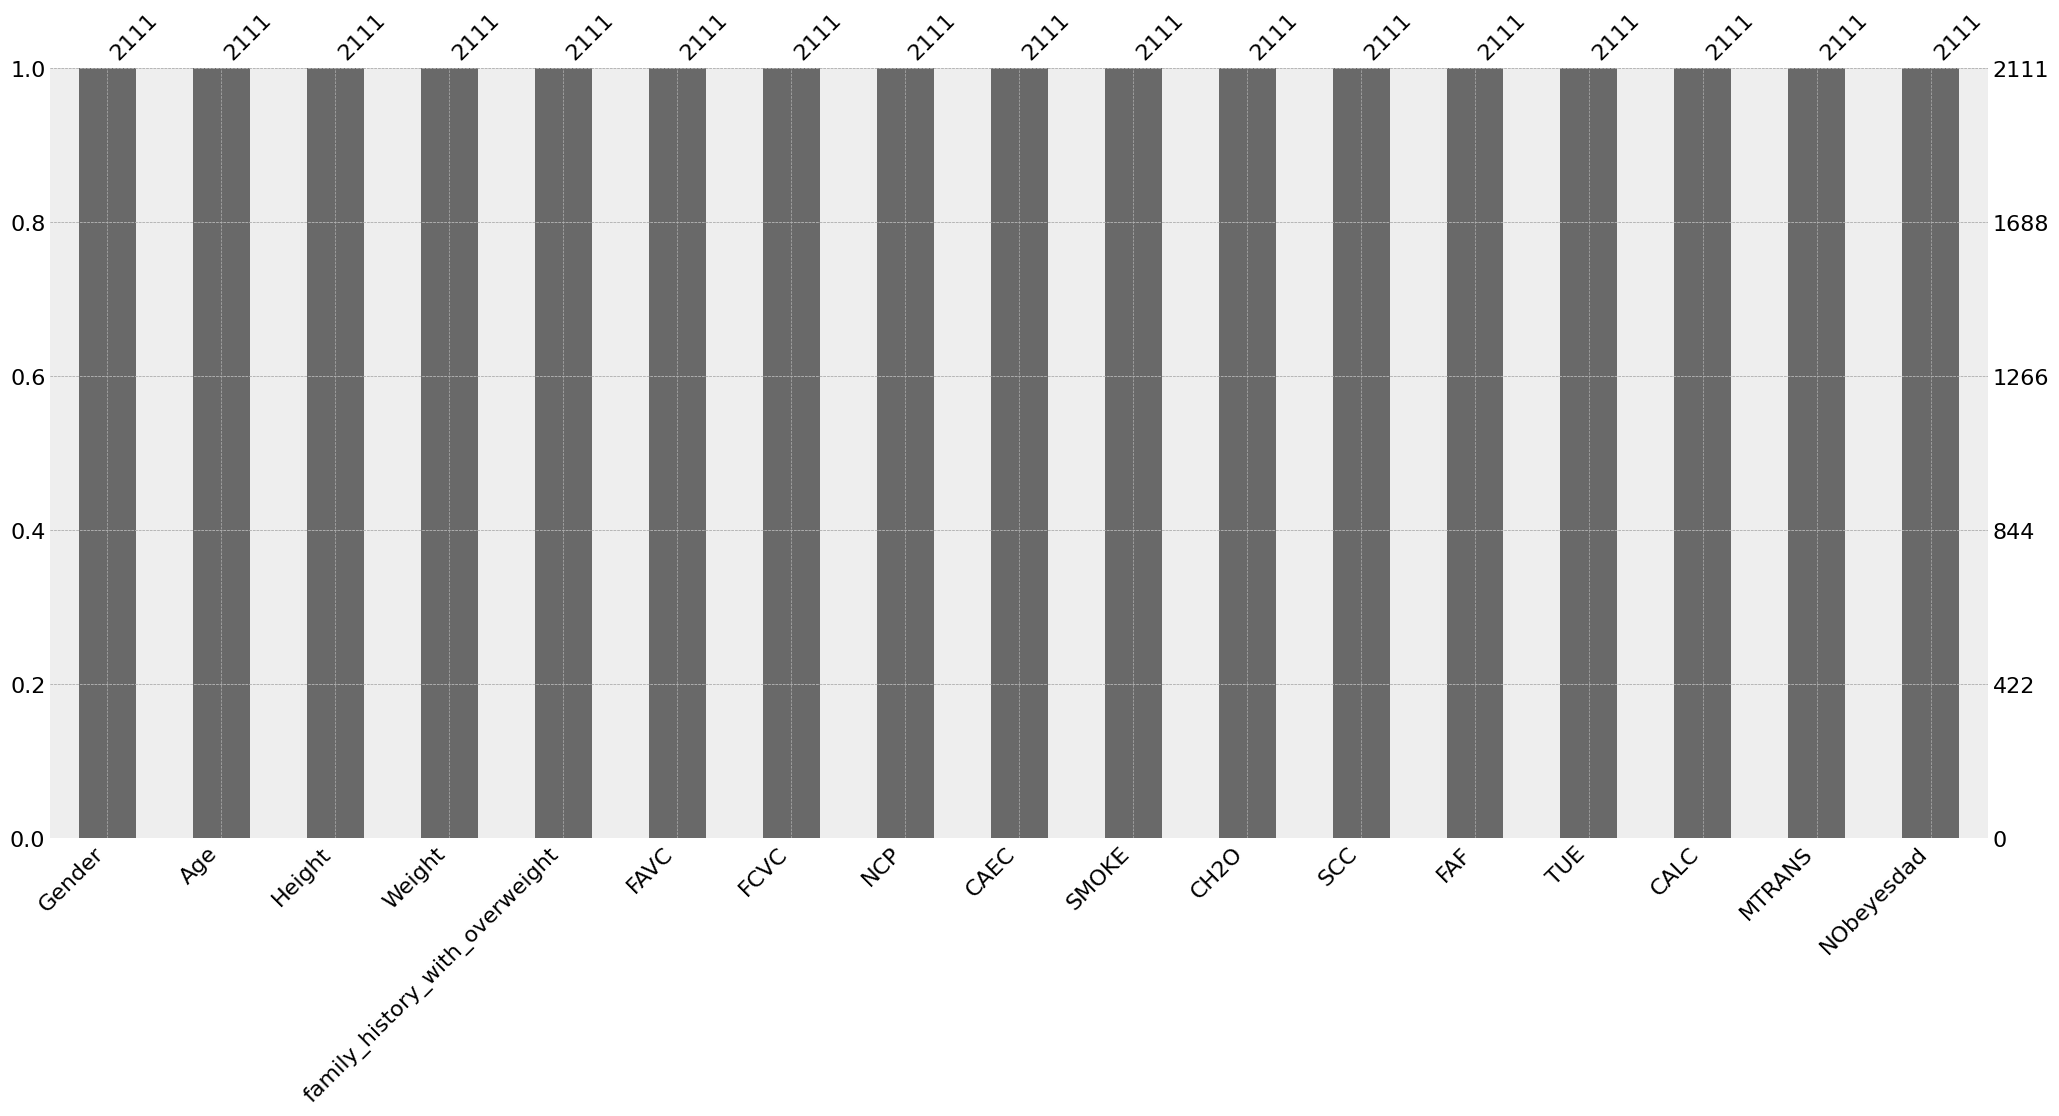

In [ ]:
# Visualización con barras: Visualiza la completitud del conjunto de datos
msno.bar(df)

In [ ]:
# Verificamos la existencia de duplicados
print(f"La presencia de datos duplicados es: {df.duplicated().any()}")
df.duplicated().value_counts()

La presencia de datos duplicados es: True


False    2087
True       24
Name: count, dtype: int64

Podemos notar que no existen datos nulos, pero que si hay filas repetidas, a las cuales se decide no quitarlas dado que como se indicó al inicio, el relevamiento original fue sobre 2111 personas de distintos países, por lo que no se descarta que una cierta cantidad mínima de datos se puedan repetir, siendo para este caso menor al 1,5porciento.

### Verificación de valores outliers:

#### Método IQR

In [ ]:
# Creamos una función para analizar los valores outliers
def detectar_outliers_iqr(df, columnas):
    resultado_outliers = pd.DataFrame(index=df.index)

    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        es_outlier = (df[columna] < limite_inferior) | (df[columna] > limite_superior)

        resultado_outliers[columna] = es_outlier

    return resultado_outliers

In [ ]:
# Hacemos uso de la función anterior
var_num_ini = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
outliers_iqr = detectar_outliers_iqr(df, var_num_ini)

print(outliers_iqr)

        Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
0     False   False   False  False  False  False  False  False
1     False   False   False  False  False  False  False  False
2     False   False   False  False  False  False  False  False
3     False   False   False  False  False  False  False  False
4     False   False   False  False   True  False  False  False
...     ...     ...     ...    ...    ...    ...    ...    ...
2106  False   False   False  False  False  False  False  False
2107  False   False   False  False  False  False  False  False
2108  False   False   False  False  False  False  False  False
2109  False   False   False  False  False  False  False  False
2110  False   False   False  False  False  False  False  False

[2111 rows x 8 columns]


#### Método Z-score

In [ ]:
def detectar_outliers_zscore(df, columnas, umbral=3):
    resultado_outliers = pd.DataFrame(index=df.index, columns=columnas)

    for columna in columnas:
        media = df[columna].mean()
        desviacion_std = df[columna].std()

        # Calcula el Z-score absoluto
        z_score = ((df[columna] - media) / desviacion_std).abs()

        # Marca como True los outliers y False los demás
        resultado_outliers[columna] = z_score > umbral

    return resultado_outliers

In [ ]:
# Aplicar la función a las columnas de interés
outliers_zscore = detectar_outliers_zscore(df, var_num_ini)

print(outliers_zscore)

        Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
0     False   False   False  False  False  False  False  False
1     False   False   False  False  False  False  False  False
2     False   False   False  False  False  False  False  False
3     False   False   False  False  False  False  False  False
4     False   False   False  False  False  False  False  False
...     ...     ...     ...    ...    ...    ...    ...    ...
2106  False   False   False  False  False  False  False  False
2107  False   False   False  False  False  False  False  False
2108  False   False   False  False  False  False  False  False
2109  False   False   False  False  False  False  False  False
2110  False   False   False  False  False  False  False  False

[2111 rows x 8 columns]


#### Método Isolation Forest

In [ ]:
# Suponiendo que 'columnas_a_analizar' contiene las columnas de interés en tu DataFrame 'df'
clf = IsolationForest(random_state=73)
df['outlier_isolation'] = clf.fit_predict(df[var_num_ini])

# Convertir las etiquetas de -1 (outlier) y 1 (no outlier) a 0 y 1, respectivamente
df['outlier_isolation'] = df['outlier_isolation'].map({-1: 1, 1: 0})

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,outlier_isolation
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0


#### Análisis de los distintos métodos

In [ ]:
# Definir una regla heurística donde un registro se considera un outlier si al menos el 80% de las columnas lo indican
porcentaje_para_outlier = 0.8

# Calcular el porcentaje de columnas que consideran cada registro como outlier para Z-score y IQR
porcentaje_outliers_zscore = outliers_zscore.mean(axis=1)
porcentaje_outliers_iqr = outliers_iqr.mean(axis=1)

# Aplicar la regla heurística para marcar registros como outliers en el DataFrame original
df['outlier_zscore'] = porcentaje_outliers_zscore >= porcentaje_para_outlier
df['outlier_iqr'] = porcentaje_outliers_iqr >= porcentaje_para_outlier

# Convertir los booleanos a valores numéricos para consistencia con 'outliers_isolation'
df['outlier_zscore'] = df['outlier_zscore'].astype(int) * 1  # 1 para outliers, 0 para no outliers
df['outlier_iqr'] = df['outlier_iqr'].astype(int) * 1  # 1 para outliers, 0 para no outliers

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,outlier_isolation,outlier_zscore,outlier_iqr
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0,0,0
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,0,0
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,0,0
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,0,0
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,0,0


In [ ]:
# Analizamos la cantidad de valores que se consideran outliers
df.outlier_isolation.value_counts()

outlier_isolation
0    1366
1     745
Name: count, dtype: int64

In [ ]:
# Analizamos la cantidad de valores que se consideran outliers
df.outlier_zscore.value_counts()

outlier_zscore
0    2111
Name: count, dtype: int64

In [ ]:
# Analizamos la cantidad de valores que se consideran outliers
df.outlier_iqr.value_counts()

outlier_iqr
0    2111
Name: count, dtype: int64

En base a la regla heurística adoptada, y al posterior conteo de los valores, se puede notar que el único método que detecta valores outliers es Isolation Forest, por lo que se decide no eliminarlos.

In [ ]:
# Eliminamos los campos agregados en el estudio de los valores outliers
df = df.drop('outlier_isolation', axis=1)
df = df.drop('outlier_zscore', axis=1)
df = df.drop('outlier_iqr', axis=1)

## **6 - Agregamos el campo IMC (Índice Masa Corporal):**

In [ ]:
# Agregamos la columna IMC
df['IMC'] = (df['Weight'] / (df['Height'] * df['Height']))

# Redondeamos la cantidad de decimales
df['IMC'] = df['IMC'].round(1)

In [ ]:
# creamos una función para categorizar IMC
def categorias_imc(IMC):
    if IMC < 18.5:
        return 'insuficiente'
    elif 18.5 <= IMC < 25:
        return 'normal'
    elif 25 <= IMC < 27:
        return 'sobrepeso_I'
    elif 27 <= IMC < 30:
        return 'sobrepeso_II'
    elif 30 <= IMC < 35:
        return 'obesidad_I'
    elif 35 <= IMC < 40:
        return 'obesidad_II'
    else:
        return 'obesidad_III'

# Agregamos una nueva columna con la categorización
df['cat_IMC'] = df['IMC'].apply(categorias_imc)

In [ ]:
# Verifico los valores únicos de NObeyesdad
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [ ]:
# Verifico los valores únicos de cat_IMC
df['cat_IMC'].value_counts()

cat_IMC
obesidad_I      369
obesidad_II     334
normal          303
sobrepeso_II    292
sobrepeso_I     276
obesidad_III    270
insuficiente    267
Name: count, dtype: int64

Si queremos comparar la cantidad de datos de las distintas categorias de NObeyesdad con las de cat_IMC obtenemos que los valores difieren:
*   Insufficient_Weight: 272
*   insuficiente: 267


*   Normal_Weight: 287
*   normal: 303


*   Overweight_Level_I: 290
*   sobrepeso_I: 276


*   Overweight_Level_II: 290
*   sobrepeso_II: 292


*   Obesity_Type_I: 351
*   obesidad_I: 369


*   Obesity_Type_II: 297
*   obesidad_II: 334


*   Obesity_Type_III: 324
*   obesidad_III: 270

In [ ]:
# Creamos el gráfico
fig = px.histogram(df, x = "NObeyesdad", color ="cat_IMC", text_auto = True, title = 'Conteo de NObeyesdad separado por cat_IMC',
                   color_discrete_map = {'insuficiente': 'lightsalmon', 'normal': 'royalblue', 'sobrepeso_I': 'lightskyblue', 'sobrepeso_II': 'lightseagreen', 'obesidad_I': 'gold', 'obesidad_II': 'darkorange', 'obesidad_III': 'crimson'},
                   category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))

# Mostramos el gráfico
fig.show()

## **7 - ¿Cómo se dividen los datos respecto al género?**

In [ ]:
# Mostramos los valores únicos:
print(f"Gender: {df.Gender.unique()}\n")

Gender: ['Female' 'Male']



In [ ]:
# Creo el gráfico
fig = px.histogram(df, x='Gender', text_auto = True, title=(f'Distribución por género'), color_discrete_sequence = ['mediumpurple'], width=600, height=400)

# Mostramos el gráfico
fig.show()

El relevamiento cuenta con 1068 encuestados masculinos, y 1043 encuestadas femeninas, es decir, la diferencia es menor al 1%.

## **8 - Análisis de las variables categóricas:**

A continuación se realiza el estudio de las variables categóricas, tanto univariadamente, como diferenciando por el género.

### **family_history_with_overweight:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"family_history_with_overweight: {df.family_history_with_overweight.unique()}")

family_history_with_overweight: ['yes' 'no']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='family_history_with_overweight', text_auto = True, title=(f'Distribución por "family_history_with_overweight"'),
                       color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='family_history_with_overweight', color ='Gender', text_auto = True,
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

Solo entre un 15 y un 20% no poseen antecedentes familiares de sobrepeso.

### **FAVC:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"FAVC: {df.FAVC.unique()}")

FAVC: ['no' 'yes']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='FAVC', text_auto = True, title=(f'Distribución por "FAVC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='FAVC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

Más del 85% consume alimentos altos en calorías, siendo bastante parecido entre mujeres y varones.

### **CAEC:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"CAEC: {df.CAEC.unique()}")

CAEC: ['Sometimes' 'Frequently' 'Always' 'no']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='CAEC', text_auto = True, title=(f'Distribución por "CAEC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400,
                      category_orders=dict(CAEC=['no', 'Sometimes',  'Frequently', 'Always']))
fig2 = px.histogram(df, x='CAEC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400,
                      category_orders=dict(CAEC=['no', 'Sometimes',  'Frequently', 'Always']))
fig1.show()
fig2.show()

Menos del 3% no consume alimentos entre comidas, mientras que una gran mayoria lo hace solo en ocasiones.

### **SMOKE:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"SMOKE: {df.SMOKE.unique()}")

SMOKE: ['no' 'yes']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='SMOKE', text_auto = True, title=(f'Distribución por "SMOKE"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='SMOKE', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

Menos del 2% fuma, siendo levemente mayor para las mujeres.

### **SCC:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"SCC: {df.SCC.unique()}")

SCC: ['no' 'yes']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='SCC', text_auto = True, title=(f'Distribución por "SCC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='SCC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

Más del 95% no controla las calorías que consume.

### **CALC:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"CALC: {df.CALC.unique()}")

CALC: ['no' 'Sometimes' 'Frequently' 'Always']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='CALC', text_auto = True, title=(f'Distribución por "CALC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400,
                      category_orders=dict(CALC=['no', 'Sometimes',  'Frequently', 'Always']))
fig2 = px.histogram(df, x='CALC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400,
                      category_orders=dict(CALC=['no', 'Sometimes',  'Frequently', 'Always']))
fig1.show()
fig2.show()

Apróximadamente el 30% manifiesta no consumir alcohol, y menos del 4% lo realiza con frecuencia o siempre.

### **MTRANS:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"MTRANS: {df.MTRANS.unique()}")

MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='MTRANS', text_auto = True, title=(f'Distribución por "MTRANS"'),
                      color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='MTRANS', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

El 75% utiliza transporte público, y sólo el 4% camina o utiliza bicicleta.


### **NObeyesdad:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"NObeyesdad: {df.NObeyesdad.unique()}")

NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='NObeyesdad', text_auto = True, title=(f'Distribución por "NObeyesdad"'),
                      color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                      category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig2 = px.histogram(df, x='NObeyesdad', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=1200, height=400,
                      category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig1.show()
fig2.show()

Se puede considerar que la muestra se distribuye pareja, siendo Obesity_Type_I el que más casos posee con el 16.6%, y Insufficient_Weight el de menos casos con el 12.9%.


### **cat_IMC:**

In [ ]:
# Verificamos los valores únicos de las variables categóricas
print(f"cat_IMC: {df.cat_IMC.unique()}")

cat_IMC: ['normal' 'sobrepeso_I' 'sobrepeso_II' 'obesidad_I' 'insuficiente'
 'obesidad_II' 'obesidad_III']


In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='cat_IMC', text_auto = True, title=(f'Distribución por "cat_IMC"'),
                      color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                      category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig2 = px.histogram(df, x='cat_IMC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=1200, height=400,
                      category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig1.show()
fig2.show()

En este caso el 17.5% se da para obesidad_I como mayor, y el 12.7% para insuficiente como menor, muy parejo con obesidad_III con el 12.8%.

## **9 - Análisis de las variables numéricas:**

In [ ]:
# Hacemos un primer análisis estadístico general
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701620,86.586035,2.419043,2.685628,2.008011,1.010298,0.657866,29.702511
std,6.308664,0.093368,26.191163,0.533927,0.778039,0.612953,0.850592,0.608927,8.016745
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,19.000000,1.630000,65.470000,2.000000,2.658738,1.584812,0.124505,0.000000,24.300000
50%,22.000000,1.700000,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.700000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.477420,1.666678,1.000000,35.950000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.800000


Mínimos y máximos de los campos numéricos:
*   Age: de 14 a 61 años
*   Height: de 1.45 a 1.98 metros
*   Weight: de 39.00 a 173.00 kilos
*   FCVC: de 1.00 a 3.00
*   NCP: de 1.00 a 4.00
*   CH2O: de 1.00 a 3.00
*   FAF: de 0.00 a 3.00
*   TUE: de 0.00 a 2.00
*   IMC: de 13.00 a 50.80

A continuación se realiza el estudio de las variables numéricas, tanto univariadamente, como diferenciando por el género.

### **Age:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='Age', title=(f'Distribución por "Age"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='Age', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

La franja etaria que fue mayormente consultada se encuentra entre los 20 y los 30 años apróximadamente. Disminuyendo considerablemente pasados los 40 años.


### **Height:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='Height', title=(f'Distribución por "Height"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='Height', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Las alturas que poseen mayores consultas radican entre 1.60 y 1.80 metros, apróximadamente. Siendo los varones considerablemente más altos respecto a las mujeres.

### **Weight:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='Weight', title=(f'Distribución por "Weight"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='Weight', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Hay una amplia variación de pesos, disminuyendo los casos cuando se superan los 130kg apróximadamente.



### **FCVC:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='FCVC', title=(f'Distribución por "FCVC"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='FCVC', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Adoptando que: 1 = Nunca, 2 = A veces, 3 = Siempre; por lo que se puede decir que gran parte consume vegetales.


### **NCP:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='NCP', title=(f'Distribución por "NCP"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='NCP', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

La mayoria realiza 3 comidas principales, mientras que los extremos de 1 o 4 comidas también sobresalen en medidas muy inferiores.

### **CH2O:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='CH2O', title=(f'Distribución por "CH2O"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='CH2O', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

La mayoria de las personas tienen un consumo medio de agua.

### **FAF:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='FAF', title=(f'Distribución por "FAF"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='FAF', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Adoptamos que: 0 = Ninguna, 1 = Baja, 2 = Moderada, 3 = Alta.

Un gran número de las personas no realiza ningún tipo de actividad, siendo mucho mayor para los varones.

### **TUE:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='TUE', title=(f'Distribución por "TUE"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='TUE', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Adoptamos que: 0 = Bajo, 1 = Medio, 2 = Alto.

Un gran porcentaje de las personas utiliza poco tiempo dispositivos tecnológicos.

### **IMC:**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='IMC', title=(f'Distribución por "IMC"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='IMC', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

### **Análisis relación entre todas las variables numéricas:**

In [ ]:
# Creamos la figura y la mostramos
var_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMC']
fig = px.scatter_matrix(df, dimensions= var_num, title=(f'Relación entre variables numéricas'),
                       color_discrete_sequence = ['mediumpurple'], width=1200, height=1200)
fig.show()

Se observan varias cuestiones: la fuerte relación lineal entre Weight y el IMC debido a que se relacionan con la correspondiente fórmula; se puede deducir que a mayor edad disminuye el uso de dispositivos electrónicos, como de actividad física; pero como llamativo se observa que en varios casos existe una segmentación de los datos indicada con líneas verticales y/o horizontales.

## **10 - ¿La población consultada tiene mayoritariamente algún grado de sobrepeso u obesidad?**

**Prueba hipótesis para la media de una población (test univariado):**

*Hipótesis nula:
> La hipótesis nula corresponde a la hipótesis de no cambio: $H_0:\mu=\mu_0$. En nuestro caso, $H_0$ sería equivalente a plantear la hipótesis de que el IMC promedio para toda la población $\mu$ es el mismo que el IMC máximo dentro de la franja que se considera "normal", siendo  $\mu_0 = 24.9$. Se quiere probar si $H_0$ es incorrecto; es decir, si $\mu$ es diferente de $\mu_0 = 24.9$.

*Hipótesis alternativa:
> En oposición a la hipótesis nula, definimos una hipótesis alternativa (indicada con $H_a$​) para desafiar el statu quo. Nuestra hipótesis alternativa considera que mayoritariamente la población tiene algún grado de sobrepeso: $H_a: \mu > \mu_0$




*Realización de una prueba de hipótesis:
> Se quiere realizar una prueba estadística para evaluar la hipótesis de gestión:

$$ H_0: \mu= 24.9$$
$$ H_a: \mu > 24.9$$

In [ ]:
# Media previa a considerar
media_ant = 24.9

# Realizamos la prueba t de una muestra
t_stat, p_valor = stats.ttest_1samp(df['IMC'], media_ant)
p_valor/=2

# Imprimimos el estadístico de prueba y el p-valor
print(f"Estadística t: {t_stat}")
print(f"P-valor: {p_valor}")

Estadística t: 27.524178283104902
P-valor: 4.636821665122235e-143


**Alfa (α):** o nivel de significancia, lo vamos a establecer en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de estar equivocados al rechazar la hipótesis nula.  

**Nivel de Confianza (1−α):** es el complemento de alfa. Como alfa es 0.05, entonces el nivel de confianza es 0.95 o 95%.

Como el P-valor es practicamente nulo, mucho menor que Alfa adoptado, se considera que $H_0$ es falso, y se rechaza. Se concluye que existe evidencia estadística para la alternativa $H_a$ y que el IMC de la población estudiada está por arriba del IMC considerado normal.

In [ ]:
# Calculo la media, mediana y moda
media= df['IMC'].mean()
mediana= df['IMC'].median()
moda= df['IMC'].mode().values[0]

# Creamos y mostramos la figura
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", x=df.IMC, marker_color='mediumpurple', name='IMC'))
fig.add_trace(go.Scatter(x=[media_ant, media_ant], y=[0, 160], mode='lines', name='media anterior', line=dict(color='salmon', width=4)))
fig.add_trace(go.Scatter(x=[media, media], y=[0, 160], mode='lines', name='media', line=dict(color='crimson', width=4)))
fig.add_trace(go.Scatter(x=[mediana, mediana], y=[0, 160], mode='lines', name='mediana', line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=[moda, moda], y=[0, 160], mode='lines', name='moda', line=dict(color='darkorange', width=4)))
fig.update_layout(title_text='Distribución de IMC', xaxis_title_text='IMC', yaxis_title_text='Count', bargap=0.2, bargroupgap=0.05)
fig.show()

Debido a la marcación de la media, la mediana y la moda en la gráfica podemos observar una asimetría positiva.

## **11 - ¿Cómo se relaciona el peso con la altura?**

In [ ]:
# Creamos y mostramos el gráfico
fig = px.scatter(df, x='Weight', y='Height', title=(f'Relación entre el Height y Weight'),
                       color_discrete_sequence = ['mediumpurple'], width=600, height=600)
fig.show()

In [ ]:
# Coeficiente Pearson para Numérico vs Numérico
pearson_coefficient = pearsonr(df['Height'], df['Weight'])[0]
print('pearson_coefficient: ', pearson_coefficient)

pearson_coefficient:  0.4622636143007579


Dado que el valor se encuentra próximo a 0.5 se puede decir que nuestras variables tienen una correlación positiva.

## **12 - ¿Influyen los antecedentes familiares en el sobrepeso?**

### **Prueba hipótesis para la media de dos poblaciones (test bivariado):**

*Hipótesis nula:
> Siendo $\mu_1$ la media del IMC de la población con antecedentes familiares de sobrepeso, y $\mu_2$ la media del IMC de la población sin antecedentes. Se considera que: $H_0:\mu_1=\mu_2$.

*Hipótesis alternativa:
> En oposición a la hipótesis nula, la hipótesis alternativa plantea que el IMC de ambas poblaciones es distinto: $H_a: \mu_1 \neq \mu_2$

*Realización de una prueba de hipótesis:
> Se quiere realizar una prueba estadística para evaluar la hipótesis de gestión:
$$ H_0: \mu_1=\mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

In [ ]:
# Filtramos los datos para obtener el IMC de las personas en base a los antecedentes familiares de sobrepeso
fh_yes = df[df.family_history_with_overweight == "yes"].IMC
fh_no = df[df.family_history_with_overweight == "no"].IMC

# Realizamos la prueba t independiente para comparar las medias de los dos grupos
#Usamos equal_var=False para realizar la prueba t de Welch, que no asume igualdad de varianzas
statistic, pvalue = stats.ttest_ind(fh_yes, fh_no, equal_var=False)

# Imprimimos el estadístico de prueba y el p-valor
print(f"Estadística t: {statistic}")
print(f"P-valor: {pvalue}")

Estadística t: 35.78734926047313
P-valor: 1.0147230624429855e-181


**Alfa (α):** o nivel de significancia, lo vamos a establecer en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de estar equivocados al rechazar la hipótesis nula.  

**Nivel de Confianza (1−α):** es el complemento de alfa. Como alfa es 0.05, entonces el nivel de confianza es 0.95 o 95%.

Como el P-valor es practicamente nulo, mucho menor que Alfa adoptado, se considera que $H_0$ es falso, y se rechaza. Se concluye que existe evidencia estadística para la alternativa $H_a$ y que el IMC de ambas poblaciones es diferente.

In [ ]:
# Creamos y mostramos el gráfico
fig = px.box(df, x='family_history_with_overweight', y='IMC', title=(f'IMC respecto a los antecedentes familiares de sobrepeso'),
             color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig.show()

Se puede concluir que si afectan los antecedentes familiares en el sobrepeso.

### **Se realiza el mismo estudio en base a las variables de categorización 'NObeyesdad' y 'cat_IMC':**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='NObeyesdad', title=(f'Distribución por "NObeyesdad"'), color='family_history_with_overweight', marginal= 'box',
                    text_auto = True, color_discrete_map = {'yes': 'lightslategray', 'no': 'purple'}, width=1300, height=600,
                    category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig2 = px.histogram(df, x='cat_IMC', title=(f'Distribución por "cat_IMC"'), color ='family_history_with_overweight', marginal='box',
                    text_auto = True, color_discrete_map = {'yes': 'lightslategray', 'no': 'purple'}, width=1300, height=600,
                    category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig1.show()
fig2.show()

Podemos observar que las personas que poseen algún grado de sobrepeso u obesidad, casi en su totalidad, poseen antecedentes familiares. Mientras que en los casos de "Insufficient_Weight"/"insuficiente" y "Normal_Weight"/"normal" se dan de forma más pareja los casos con y sin antecedentes.

## **13 - ¿Cómo se distribuyen las distintas categorías de NObeyesdad y de cat_IMC respecto a las edades estudiadas?**

In [ ]:
# Creamos y mostramos los gráficos
fig1 = px.box(df, x='NObeyesdad', y='Age', title=(f'Niveles de NObeyesdad respecto a la edad'), color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                    category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig2 = px.box(df, x='cat_IMC', y='Age', title=(f'Niveles de cat_IMC respecto a la edad'), color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                    category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig1.show()
fig2.show()

En base a la distribución respecto a los niveles de obesidad se puede notar que los casos extremos, "Insufficient_Weight"/"insuficiente" y "Obesity_Type_III"/"obesidad_III", se desarrollan mayoritariamente en edades más tempranas comparadas a las demás.

## **14 - Análisis de la relación entre el medio de transporte más utilizado y el peso, diferenciando si consumen tabaco o no.**

In [ ]:
# Creamos y mostramos los gráficos
fig = px.box(df, x='MTRANS', y='Weight', color='SMOKE', title=(f'Relación entre el tipo de transporte más utilizado y el peso'),
             color_discrete_map = {'yes': 'lightslategray', 'no': 'purple'}, width=800, height=400)
fig.show()

Las personas consultadas que utilizan mayoritariamente transporte público o automóviles son las de peso más elevado, y las que porcentualmente más consumen tabaco respecto a las que no lo hacen.

## **15 - Análisis de la relación entre cat_IMC, el género y el tipo de transporte utilizado.**

In [ ]:
# Creamos el gráfico y lo mostramos
fig = px.treemap(df, path=[px.Constant('all'), 'cat_IMC', 'Gender', 'MTRANS'], color= 'cat_IMC',
                 color_discrete_map = {'insuficiente': 'lightsalmon', 'normal': 'royalblue', 'sobrepeso_I': 'lightskyblue', 'sobrepeso_II': 'lightseagreen', 'obesidad_I': 'gold', 'obesidad_II': 'darkorange', 'obesidad_III': 'crimson'})
fig.update_traces(root_color='lightslategray')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), title_text='Relación entre: cat_IMC - Gender - MTRANS')
fig.show()